<a href="https://colab.research.google.com/github/anjha1/Employee-Burnout-Analysis/blob/main/Notebook/Employees_Burnout_Analysis_and_Prediction(model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
url = "https://docs.google.com/spreadsheets/d/14QVuJdFWCmW1odtzSH2Oyb5lGZzNawcu/export?format=xlsx"
df = pd.read_excel(url)

In [49]:
initial_shape = df.shape
print('Initial shape of the dataframe:', initial_shape)
df.dropna(inplace=True)
print('Shape after handling missing values:', df.shape)

Initial shape of the dataframe: (22750, 9)
Shape after handling missing values: (18590, 9)


In [50]:
duplicates = df.duplicated().sum()
print('Number of duplicate rows:', duplicates)
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print('Duplicates removed. New shape:', df.shape)
else:
    print('No duplicates found.')

Number of duplicate rows: 0
No duplicates found.


In [51]:
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
df.dtypes

,0
Employee ID,object
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


In [52]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [53]:
X = df.drop(columns=['Burn Rate'])  # Features
y = df['Burn Rate']

In [54]:
X

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Employee ID_fffe3100300030003000,Employee ID_fffe31003000300030003100,Employee ID_fffe31003000300030003200,Employee ID_fffe31003000300030003400,Employee ID_fffe31003000300030003600,Employee ID_fffe31003000300030003700,...,Employee ID_fffe3900390038003700,Employee ID_fffe3900390038003800,Employee ID_fffe390039003900,Employee ID_fffe3900390039003100,Employee ID_fffe3900390039003200,Employee ID_fffe3900390039003800,Employee ID_fffe3900390039003900,Gender_Male,Company Type_Service,WFH Setup Available_Yes
0,2008-09-30,2,3.0,3.8,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2008-11-30,1,2.0,5.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,2008-11-03,1,1.0,2.6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,2008-07-24,3,7.0,6.9,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,2008-11-26,2,4.0,3.6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22743,2008-12-15,1,3.0,6.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
22744,2008-05-27,3,7.0,6.2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
22746,2008-01-19,3,6.0,6.7,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
22748,2008-01-10,2,5.0,5.9,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [55]:
y

,Burn Rate
0,0.16
1,0.36
3,0.20
4,0.52
5,0.29
...,...
22743,0.48
22744,0.54
22746,0.59
22748,0.52


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18590 entries, 0 to 22749
Columns: 18597 entries, Date of Joining to WFH Setup Available_Yes
dtypes: bool(18592), datetime64[ns](1), float64(3), int64(1)
memory usage: 330.5 MB


In [57]:
X.dtypes

,0
Date of Joining,datetime64[ns]
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Employee ID_fffe3100300030003000,bool
...,...
Employee ID_fffe3900390039003800,bool
Employee ID_fffe3900390039003900,bool
Gender_Male,bool
Company Type_Service,bool


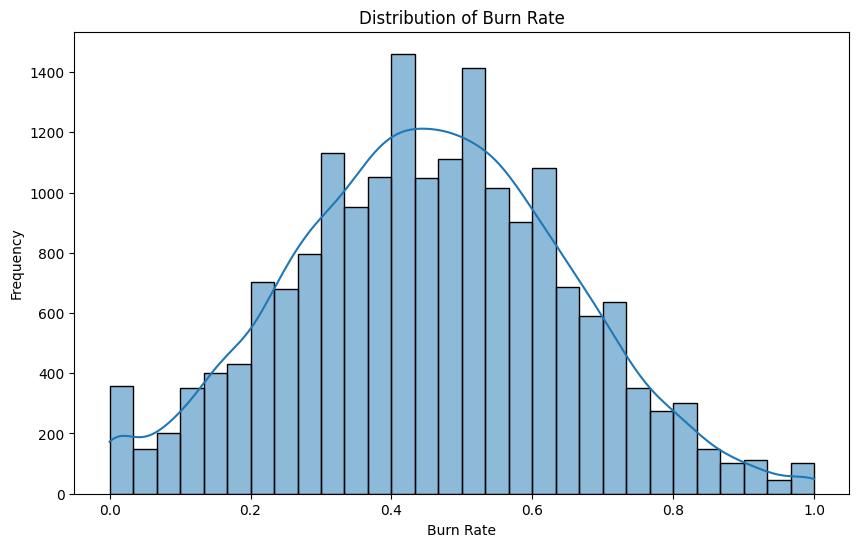

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Burn Rate')
plt.xlabel('Burn Rate')
plt.ylabel('Frequency')
plt.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('done')

done


In [60]:
print(df.dtypes)

Date of Joining                     datetime64[ns]
Designation                                  int64
Resource Allocation                        float64
Mental Fatigue Score                       float64
Burn Rate                                  float64
                                         ...      
Employee ID_fffe3900390039003800              bool
Employee ID_fffe3900390039003900              bool
Gender_Male                                   bool
Company Type_Service                          bool
WFH Setup Available_Yes                       bool
Length: 18597, dtype: object


In [61]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [62]:
X = df.drop(columns=['Burn Rate'])  # Features
y = df['Burn Rate']

In [63]:
print(X.dtypes)

Date of Joining                     datetime64[ns]
Designation                                  int64
Resource Allocation                        float64
Mental Fatigue Score                       float64
Employee ID_fffe3100300030003000              bool
                                         ...      
Employee ID_fffe3900390039003800              bool
Employee ID_fffe3900390039003900              bool
Gender_Male                                   bool
Company Type_Service                          bool
WFH Setup Available_Yes                       bool
Length: 18596, dtype: object


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
X_numeric = X.select_dtypes(include=['float64', 'int64'])
X_scaled = scaler.fit_transform(X_numeric)

print('done')

done


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [67]:
model = RandomForestRegressor(random_state=42)

In [68]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [69]:
y_pred = model.predict(X_test)

In [70]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [71]:
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 0.0029210552564667663
R^2 Score: 0.9239403332145391


In [72]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [73]:
best_model = grid_search.best_estimator_

In [74]:
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

In [75]:
print('Best Model Mean Squared Error:', mse_best)
print('Best Model R^2 Score:', r2_best)

print('done')

Best Model Mean Squared Error: 0.0028678622397261882
Best Model R^2 Score: 0.9253253953833032
done


In [76]:
unseen_predictions = best_model.predict(X_test)

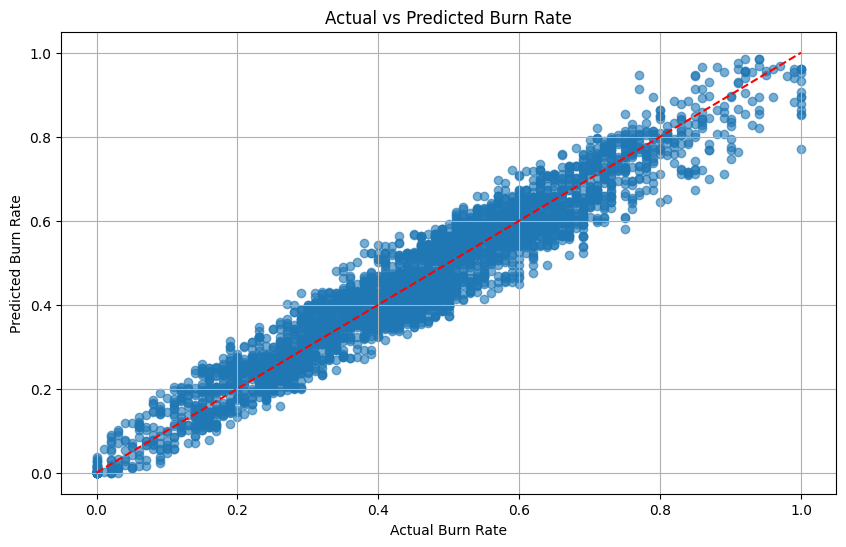

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, unseen_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect predictions
plt.title('Actual vs Predicted Burn Rate')
plt.xlabel('Actual Burn Rate')
plt.ylabel('Predicted Burn Rate')
plt.grid()
plt.show()

In [78]:
import pickle

# Save the best model as a .pkl file
model_filename = 'burn_rate_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)
print(f"Model saved to {model_filename}")


Model saved to burn_rate_model.pkl
